In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2


In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [3]:
def create_edges(images):
    edges = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        edge = cv2.Canny(gray, 100, 200)
        edges.append(edge)
    edges = np.array(edges)
    return edges


In [4]:
x_train_edges = create_edges(x_train)
x_test_edges = create_edges(x_test)

# Add channel dimension (32x32 → 32x32x1)
x_train_edges = np.expand_dims(x_train_edges, axis=-1)
x_test_edges = np.expand_dims(x_test_edges, axis=-1)


In [5]:
def normalize(img):
    return (img.astype('float32') - 127.5) / 127.5

x_train = normalize(x_train)
x_test = normalize(x_test)
x_train_edges = normalize(x_train_edges)
x_test_edges = normalize(x_test_edges)


In [6]:
def build_model():
    inputs = layers.Input(shape=(32, 32, 1))

    # Encoder
    x = layers.Conv2D(64, 4, strides=2, padding='same', activation='relu')(inputs)
    x = layers.Conv2D(128, 4, strides=2, padding='same', activation='relu')(x)

    # Bottleneck
    x = layers.Conv2D(256, 4, strides=2, padding='same', activation='relu')(x)

    # Decoder
    x = layers.Conv2DTranspose(128, 4, strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(64, 4, strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(x)

    model = models.Model(inputs, x)
    return model

model = build_model()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 64)     │       131,136 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 3)      │         3,075 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315,459 (5.02 MB)

 Trainable params: 1,315,459 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(2e-4),
    loss='mse'   # L2 Loss
)


In [8]:
loss='mae'#L1


In [9]:
history = model.fit(
    x_train_edges,
    x_train,
    validation_data=(x_test_edges, x_test),
    epochs=30,
    batch_size=64
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.2459 - val_loss: 0.2364
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2361 - val_loss: 0.2330
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2332 - val_loss: 0.2311
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2291 - val_loss: 0.2303
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2233 - val_loss: 0.2287
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2166 - val_loss: 0.2306
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2085 - val_loss: 0.2342
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1979 - val_loss: 0.2384
Epoch 9/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1865 - val_loss: 0.2461
Epoch 10/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1755 - val_loss: 0.2505
Epoch 11/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1653 - val_loss: 0.2589
Epoch 12/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/st

In [10]:
def denormalize(img):
    return ((img + 1) * 127.5).astype(np.uint8)


In [11]:
preds = model.predict(x_test_edges[:5])

edge_imgs = denormalize(x_test_edges[:5])
real_imgs = denormalize(x_test[:5])
gen_imgs = denormalize(preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


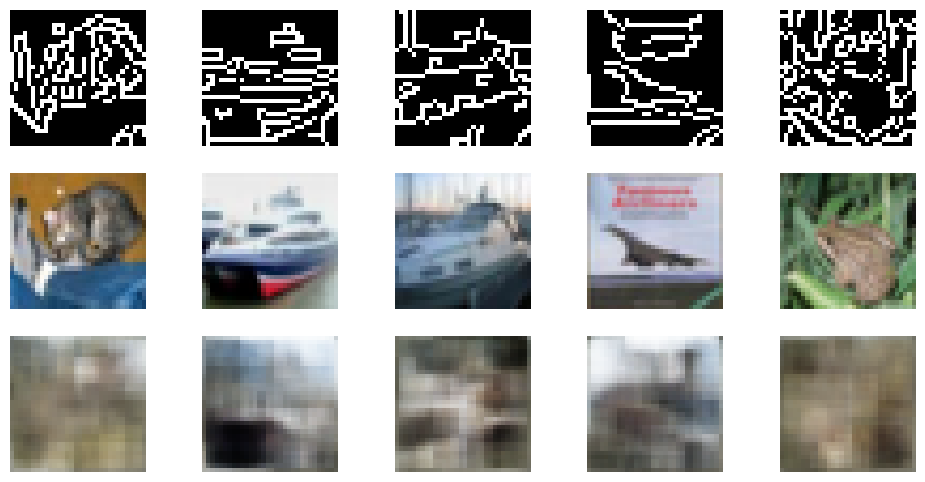

In [12]:
plt.figure(figsize=(12, 6))

for i in range(5):
    # Edge
    plt.subplot(3, 5, i+1)
    plt.imshow(edge_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')

    # Real
    plt.subplot(3, 5, i+6)
    plt.imshow(real_imgs[i])
    plt.axis('off')

    # Generated
    plt.subplot(3, 5, i+11)
    plt.imshow(gen_imgs[i])
    plt.axis('off')

plt.show()


In [13]:
loss='mae'


In [14]:
history2 = model.fit(
    x_train_edges,
    x_train,
    validation_data=(x_test_edges, x_test),
    epochs=30,
    batch_size=64
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0886 - val_loss: 0.3041
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0875 - val_loss: 0.3053
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0866 - val_loss: 0.3078
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0853 - val_loss: 0.3069
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0842 - val_loss: 0.3103
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0837 - val_loss: 0.3112
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0823 - val_loss: 0.3135
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0815 - val_loss: 0.3148
Epoch 9/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0807 - val_loss: 0.3137
Epoch 10/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0799 - val_loss: 0.3122
Epoch 11/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0794 - val_loss: 0.3125
Epoch 12/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step

In [15]:
def denormalize(img):
    return ((img + 1) * 127.5).astype(np.uint8)


In [16]:
preds = model.predict(x_test_edges[:5])

edge_imgs = denormalize(x_test_edges[:5])
real_imgs = denormalize(x_test[:5])
gen_imgs = denormalize(preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


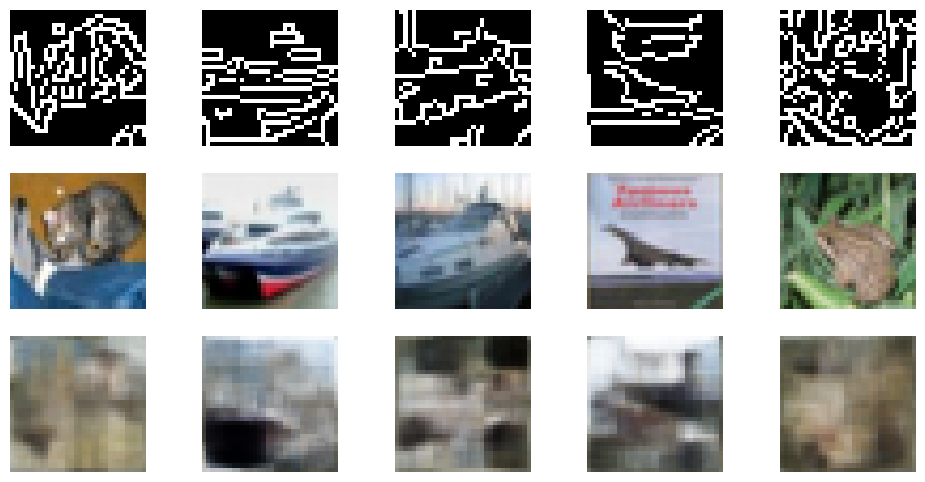

In [17]:
plt.figure(figsize=(12, 6))

for i in range(5):
    # Edge
    plt.subplot(3, 5, i+1)
    plt.imshow(edge_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')

    # Real
    plt.subplot(3, 5, i+6)
    plt.imshow(real_imgs[i])
    plt.axis('off')

    # Generated
    plt.subplot(3, 5, i+11)
    plt.imshow(gen_imgs[i])
    plt.axis('off')

plt.show()


In [18]:
def build_unet():
    inputs = tf.keras.layers.Input(shape=(32,32,1))

    # ----- Encoder -----
    c1 = tf.keras.layers.Conv2D(64,3,padding='same',activation='relu')(inputs)
    c1 = tf.keras.layers.Conv2D(64,3,padding='same',activation='relu')(c1)
    p1 = tf.keras.layers.MaxPooling2D()(c1)

    c2 = tf.keras.layers.Conv2D(128,3,padding='same',activation='relu')(p1)
    c2 = tf.keras.layers.Conv2D(128,3,padding='same',activation='relu')(c2)
    p2 = tf.keras.layers.MaxPooling2D()(c2)

    # ----- Bottleneck -----
    b = tf.keras.layers.Conv2D(256,3,padding='same',activation='relu')(p2)
    b = tf.keras.layers.Conv2D(256,3,padding='same',activation='relu')(b)

    # ----- Decoder -----
    u1 = tf.keras.layers.UpSampling2D()(b)
    u1 = tf.keras.layers.Concatenate()([u1, c2])
    c3 = tf.keras.layers.Conv2D(128,3,padding='same',activation='relu')(u1)
    c3 = tf.keras.layers.Conv2D(128,3,padding='same',activation='relu')(c3)

    u2 = tf.keras.layers.UpSampling2D()(c3)
    u2 = tf.keras.layers.Concatenate()([u2, c1])
    c4 = tf.keras.layers.Conv2D(64,3,padding='same',activation='relu')(u2)
    c4 = tf.keras.layers.Conv2D(64,3,padding='same',activation='relu')(c4)

    outputs = tf.keras.layers.Conv2D(3,1,activation='tanh')(c4)

    return tf.keras.Model(inputs, outputs)


In [19]:
model = build_unet()
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     36,928 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │    147,584 │ conv2d_5[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 128) │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 8, 8, 256) │    295,168 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8, 256) │    590,080 │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 16, 16,    │          0 │ conv2d_8[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 384)              │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │    442,496 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 16, 16,    │    147,584 │ conv2d_9[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 32, 32,    │          0 │ conv2d_10[0][0]   │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32, 32,    │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 192)              │            │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 32, 32,    │    110,656 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │     36,928 │ conv2d_11[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,882,115 (7.18 MB)

 Trainable params: 1,882,115 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(2e-4),
    loss='mae'
)


In [21]:
history = model.fit(
    x_train_edges,
    x_train,
    validation_data=(x_test_edges, x_test),
    epochs=30,
    batch_size=64
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - loss: 0.4050 - val_loss: 0.3921
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 38ms/step - loss: 0.3917 - val_loss: 0.3851
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.3832 - val_loss: 0.3766
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.3744 - val_loss: 0.3740
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.3684 - val_loss: 0.3713
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.3595 - val_loss: 0.3708
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.3499 - val_loss: 0.3705
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.3409 - val_loss: 0.3725
Epoch 9/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.3282 - val_loss: 0.3775
Epoch 10/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.3150 - val_loss: 0.3773
Epoch 11/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - loss: 0.3029 - val_loss: 0.3868
Epoch 12/30
782/782 ━━━━━━━━━━

In [22]:
def denormalize(x):
    return ((x + 1) * 127.5).astype(np.uint8)


In [23]:
preds = model.predict(x_test_edges[:5])

edge_imgs = denormalize(x_test_edges[:5])
real_imgs = denormalize(x_test[:5])
gen_imgs = denormalize(preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step


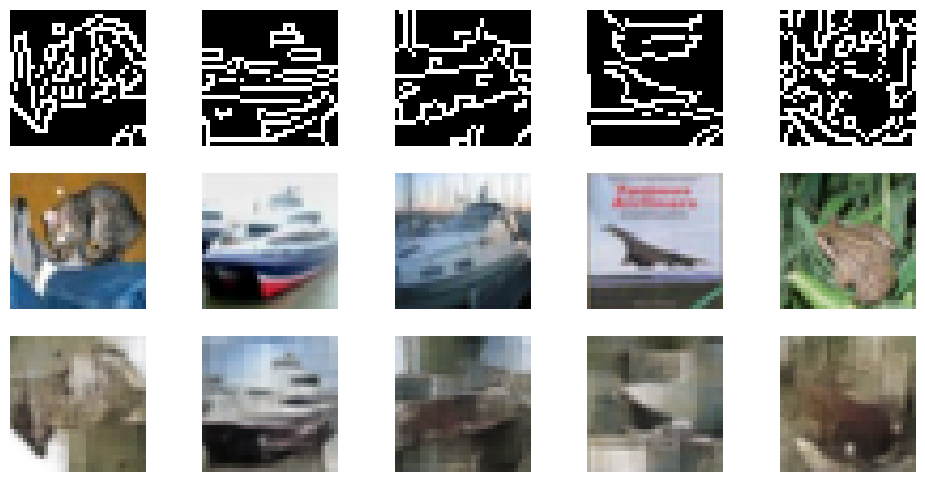

In [24]:
plt.figure(figsize=(12,6))

for i in range(5):
    # Edge
    plt.subplot(3,5,i+1)
    plt.imshow(edge_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')

    # Real
    plt.subplot(3,5,i+6)
    plt.imshow(real_imgs[i])
    plt.axis('off')

    # Generated
    plt.subplot(3,5,i+11)
    plt.imshow(gen_imgs[i])
    plt.axis('off')

plt.show()
